In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.drop('species', axis=1)

In [5]:
y = iris['species']

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
encoder = LabelBinarizer()

In [11]:
y = encoder.fit_transform(y)

In [12]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))
# we have 3 classes and the output units is 3
model.add(Dense(3, activation='softmax'))
# multiclass classification - softmax

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

In [27]:
model.fit(scaled_X_train, y_train, epochs=1000, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/1000
120/120 [==============================] - 0s 119us/sample - loss: 0.5743 - acc: 0.7583 - val_loss: 0.6202 - val_acc: 0.7667
Epoch 2/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.5733 - acc: 0.7583 - val_loss: 0.6191 - val_acc: 0.7667
Epoch 3/1000
120/120 [==============================] - 0s 58us/sample - loss: 0.5725 - acc: 0.7583 - val_loss: 0.6180 - val_acc: 0.7667
Epoch 4/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.5716 - acc: 0.7583 - val_loss: 0.6170 - val_acc: 0.7667
Epoch 5/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.5706 - acc: 0.7667 - val_loss: 0.6161 - val_acc: 0.7667
Epoch 6/1000
120/120 [==============================] - 0s 66us/sample - loss: 0.5697 - acc: 0.7667 - val_loss: 0.6152 - val_acc: 0.7667
Epoch 7/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.5688 - acc: 0.7583 - val_loss: 0.6143 - val_acc: 0

Epoch 60/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.5274 - acc: 0.8083 - val_loss: 0.5699 - val_acc: 0.8000
Epoch 61/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.5267 - acc: 0.8083 - val_loss: 0.5692 - val_acc: 0.8000
Epoch 62/1000
120/120 [==============================] - 0s 150us/sample - loss: 0.5260 - acc: 0.8083 - val_loss: 0.5684 - val_acc: 0.8000
Epoch 63/1000
120/120 [==============================] - 0s 125us/sample - loss: 0.5254 - acc: 0.8083 - val_loss: 0.5676 - val_acc: 0.8000
Epoch 64/1000
120/120 [==============================] - 0s 158us/sample - loss: 0.5246 - acc: 0.8083 - val_loss: 0.5668 - val_acc: 0.8000
Epoch 65/1000
120/120 [==============================] - 0s 125us/sample - loss: 0.5240 - acc: 0.8083 - val_loss: 0.5661 - val_acc: 0.8000
Epoch 66/1000
120/120 [==============================] - 0s 158us/sample - loss: 0.5233 - acc: 0.8083 - val_loss: 0.5653 - val_acc: 0.8000
Epoch 67/1000
120/120 [=====

120/120 [==============================] - 0s 100us/sample - loss: 0.4913 - acc: 0.8250 - val_loss: 0.5298 - val_acc: 0.8333
Epoch 120/1000
120/120 [==============================] - 0s 74us/sample - loss: 0.4908 - acc: 0.8250 - val_loss: 0.5291 - val_acc: 0.8333
Epoch 121/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.4902 - acc: 0.8250 - val_loss: 0.5284 - val_acc: 0.8333
Epoch 122/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4897 - acc: 0.8250 - val_loss: 0.5279 - val_acc: 0.8333
Epoch 123/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.4892 - acc: 0.8250 - val_loss: 0.5271 - val_acc: 0.8333
Epoch 124/1000
120/120 [==============================] - 0s 99us/sample - loss: 0.4886 - acc: 0.8250 - val_loss: 0.5266 - val_acc: 0.8333
Epoch 125/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.4881 - acc: 0.8250 - val_loss: 0.5259 - val_acc: 0.8333
Epoch 126/1000
120/120 [===============

120/120 [==============================] - 0s 108us/sample - loss: 0.4629 - acc: 0.8333 - val_loss: 0.4988 - val_acc: 0.8333
Epoch 178/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.4624 - acc: 0.8333 - val_loss: 0.4982 - val_acc: 0.8333
Epoch 179/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4620 - acc: 0.8333 - val_loss: 0.4976 - val_acc: 0.8333
Epoch 180/1000
120/120 [==============================] - 0s 84us/sample - loss: 0.4615 - acc: 0.8333 - val_loss: 0.4972 - val_acc: 0.8333
Epoch 181/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4611 - acc: 0.8333 - val_loss: 0.4966 - val_acc: 0.8333
Epoch 182/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4606 - acc: 0.8333 - val_loss: 0.4963 - val_acc: 0.8333
Epoch 183/1000
120/120 [==============================] - ETA: 0s - loss: 0.4445 - acc: 0.812 - 0s 100us/sample - loss: 0.4603 - acc: 0.8333 - val_loss: 0.4958 - val_acc: 0.8333
E

120/120 [==============================] - 0s 100us/sample - loss: 0.4392 - acc: 0.8417 - val_loss: 0.4725 - val_acc: 0.8333
Epoch 236/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.4389 - acc: 0.8417 - val_loss: 0.4720 - val_acc: 0.8333
Epoch 237/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.4384 - acc: 0.8417 - val_loss: 0.4714 - val_acc: 0.8333
Epoch 238/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.4381 - acc: 0.8417 - val_loss: 0.4708 - val_acc: 0.8333
Epoch 239/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.4377 - acc: 0.8417 - val_loss: 0.4704 - val_acc: 0.8333
Epoch 240/1000
120/120 [==============================] - 0s 104us/sample - loss: 0.4373 - acc: 0.8500 - val_loss: 0.4699 - val_acc: 0.8667
Epoch 241/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.4370 - acc: 0.8500 - val_loss: 0.4692 - val_acc: 0.8667
Epoch 242/1000
120/120 [============

Epoch 294/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.4186 - acc: 0.8583 - val_loss: 0.4487 - val_acc: 0.8667
Epoch 295/1000
120/120 [==============================] - 0s 104us/sample - loss: 0.4183 - acc: 0.8583 - val_loss: 0.4483 - val_acc: 0.8667
Epoch 296/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.4180 - acc: 0.8583 - val_loss: 0.4479 - val_acc: 0.8667
Epoch 297/1000
120/120 [==============================] - 0s 92us/sample - loss: 0.4177 - acc: 0.8583 - val_loss: 0.4477 - val_acc: 0.8667
Epoch 298/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.4174 - acc: 0.8583 - val_loss: 0.4472 - val_acc: 0.8667
Epoch 299/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4171 - acc: 0.8583 - val_loss: 0.4468 - val_acc: 0.8667
Epoch 300/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.4167 - acc: 0.8583 - val_loss: 0.4467 - val_acc: 0.8667
Epoch 301/1000
120/120 

120/120 [==============================] - 0s 108us/sample - loss: 0.4008 - acc: 0.8667 - val_loss: 0.4285 - val_acc: 0.9000
Epoch 353/1000
120/120 [==============================] - 0s 92us/sample - loss: 0.4005 - acc: 0.8667 - val_loss: 0.4281 - val_acc: 0.9000
Epoch 354/1000
120/120 [==============================] - 0s 283us/sample - loss: 0.4002 - acc: 0.8667 - val_loss: 0.4280 - val_acc: 0.9000
Epoch 355/1000
120/120 [==============================] - 0s 117us/sample - loss: 0.3999 - acc: 0.8667 - val_loss: 0.4276 - val_acc: 0.9000
Epoch 356/1000
120/120 [==============================] - 0s 92us/sample - loss: 0.3996 - acc: 0.8667 - val_loss: 0.4273 - val_acc: 0.9000
Epoch 357/1000
120/120 [==============================] - 0s 125us/sample - loss: 0.3993 - acc: 0.8667 - val_loss: 0.4269 - val_acc: 0.9000
Epoch 358/1000
120/120 [==============================] - 0s 122us/sample - loss: 0.3990 - acc: 0.8667 - val_loss: 0.4265 - val_acc: 0.9000
Epoch 359/1000
120/120 [=============

120/120 [==============================] - 0s 125us/sample - loss: 0.3846 - acc: 0.8833 - val_loss: 0.4100 - val_acc: 0.9000
Epoch 411/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.3842 - acc: 0.8833 - val_loss: 0.4096 - val_acc: 0.9000
Epoch 412/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.3839 - acc: 0.8833 - val_loss: 0.4094 - val_acc: 0.9000
Epoch 413/1000
120/120 [==============================] - 0s 124us/sample - loss: 0.3836 - acc: 0.8833 - val_loss: 0.4092 - val_acc: 0.9000
Epoch 414/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.3834 - acc: 0.8750 - val_loss: 0.4090 - val_acc: 0.9000
Epoch 415/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.3831 - acc: 0.8750 - val_loss: 0.4087 - val_acc: 0.9000
Epoch 416/1000
120/120 [==============================] - 0s 133us/sample - loss: 0.3828 - acc: 0.8833 - val_loss: 0.4084 - val_acc: 0.9000
Epoch 417/1000
120/120 [===========

120/120 [==============================] - 0s 141us/sample - loss: 0.3695 - acc: 0.8833 - val_loss: 0.3929 - val_acc: 0.9000
Epoch 469/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.3693 - acc: 0.8833 - val_loss: 0.3926 - val_acc: 0.9000
Epoch 470/1000
120/120 [==============================] - 0s 133us/sample - loss: 0.3690 - acc: 0.8833 - val_loss: 0.3922 - val_acc: 0.9000
Epoch 471/1000
120/120 [==============================] - 0s 125us/sample - loss: 0.3688 - acc: 0.8833 - val_loss: 0.3919 - val_acc: 0.9000
Epoch 472/1000
120/120 [==============================] - 0s 133us/sample - loss: 0.3685 - acc: 0.8833 - val_loss: 0.3916 - val_acc: 0.9000
Epoch 473/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.3683 - acc: 0.8833 - val_loss: 0.3913 - val_acc: 0.9000
Epoch 474/1000
120/120 [==============================] - 0s 125us/sample - loss: 0.3680 - acc: 0.8833 - val_loss: 0.3910 - val_acc: 0.9000
Epoch 475/1000
120/120 [============

Epoch 527/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.3553 - acc: 0.8917 - val_loss: 0.3774 - val_acc: 0.9000
Epoch 528/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3550 - acc: 0.8917 - val_loss: 0.3771 - val_acc: 0.9000
Epoch 529/1000
120/120 [==============================] - 0s 66us/sample - loss: 0.3548 - acc: 0.8917 - val_loss: 0.3768 - val_acc: 0.9000
Epoch 530/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.3546 - acc: 0.8917 - val_loss: 0.3766 - val_acc: 0.9000
Epoch 531/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.3544 - acc: 0.8917 - val_loss: 0.3762 - val_acc: 0.9000
Epoch 532/1000
120/120 [==============================] - 0s 134us/sample - loss: 0.3541 - acc: 0.8917 - val_loss: 0.3759 - val_acc: 0.9000
Epoch 533/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3539 - acc: 0.8917 - val_loss: 0.3756 - val_acc: 0.9000
Epoch 534/1000
120/120 

Epoch 586/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3419 - acc: 0.8917 - val_loss: 0.3629 - val_acc: 0.9000
Epoch 587/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3418 - acc: 0.9000 - val_loss: 0.3627 - val_acc: 0.9000
Epoch 588/1000
120/120 [==============================] - 0s 66us/sample - loss: 0.3415 - acc: 0.9000 - val_loss: 0.3623 - val_acc: 0.9000
Epoch 589/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.3412 - acc: 0.9000 - val_loss: 0.3621 - val_acc: 0.9000
Epoch 590/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.3411 - acc: 0.9083 - val_loss: 0.3617 - val_acc: 0.9000
Epoch 591/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.3409 - acc: 0.9083 - val_loss: 0.3614 - val_acc: 0.9000
Epoch 592/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.3406 - acc: 0.9083 - val_loss: 0.3613 - val_acc: 0.9000
Epoch 593/1000
120/120 

120/120 [==============================] - 0s 108us/sample - loss: 0.3295 - acc: 0.9250 - val_loss: 0.3491 - val_acc: 0.9333
Epoch 645/1000
120/120 [==============================] - 0s 99us/sample - loss: 0.3293 - acc: 0.9250 - val_loss: 0.3488 - val_acc: 0.9333
Epoch 646/1000
120/120 [==============================] - 0s 123us/sample - loss: 0.3291 - acc: 0.9250 - val_loss: 0.3485 - val_acc: 0.9333
Epoch 647/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3288 - acc: 0.9250 - val_loss: 0.3483 - val_acc: 0.9333
Epoch 648/1000
120/120 [==============================] - 0s 92us/sample - loss: 0.3286 - acc: 0.9250 - val_loss: 0.3481 - val_acc: 0.9333
Epoch 649/1000
120/120 [==============================] - 0s 97us/sample - loss: 0.3284 - acc: 0.9250 - val_loss: 0.3478 - val_acc: 0.9333
Epoch 650/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.3282 - acc: 0.9250 - val_loss: 0.3476 - val_acc: 0.9333
Epoch 651/1000
120/120 [===============

Epoch 703/1000
120/120 [==============================] - 0s 107us/sample - loss: 0.3172 - acc: 0.9250 - val_loss: 0.3353 - val_acc: 0.9333
Epoch 704/1000
120/120 [==============================] - ETA: 0s - loss: 0.3747 - acc: 0.843 - 0s 100us/sample - loss: 0.3171 - acc: 0.9250 - val_loss: 0.3350 - val_acc: 0.9333
Epoch 705/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3168 - acc: 0.9250 - val_loss: 0.3348 - val_acc: 0.9333
Epoch 706/1000
120/120 [==============================] - 0s 89us/sample - loss: 0.3166 - acc: 0.9250 - val_loss: 0.3347 - val_acc: 0.9333
Epoch 707/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.3164 - acc: 0.9250 - val_loss: 0.3346 - val_acc: 0.9333
Epoch 708/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.3162 - acc: 0.9250 - val_loss: 0.3345 - val_acc: 0.9333
Epoch 709/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.3160 - acc: 0.9250 - val_loss: 0.3342 - va

120/120 [==============================] - 0s 92us/sample - loss: 0.3055 - acc: 0.9250 - val_loss: 0.3228 - val_acc: 0.9333
Epoch 762/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.3054 - acc: 0.9250 - val_loss: 0.3226 - val_acc: 0.9333
Epoch 763/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.3051 - acc: 0.9250 - val_loss: 0.3223 - val_acc: 0.9333
Epoch 764/1000
120/120 [==============================] - 0s 127us/sample - loss: 0.3050 - acc: 0.9250 - val_loss: 0.3221 - val_acc: 0.9333
Epoch 765/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.3047 - acc: 0.9250 - val_loss: 0.3219 - val_acc: 0.9333
Epoch 766/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.3045 - acc: 0.9250 - val_loss: 0.3218 - val_acc: 0.9333
Epoch 767/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.3043 - acc: 0.9250 - val_loss: 0.3216 - val_acc: 0.9333
Epoch 768/1000
120/120 [===============

120/120 [==============================] - 0s 91us/sample - loss: 0.2943 - acc: 0.9250 - val_loss: 0.3101 - val_acc: 0.9333
Epoch 820/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.2940 - acc: 0.9250 - val_loss: 0.3099 - val_acc: 0.9333
Epoch 821/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2938 - acc: 0.9250 - val_loss: 0.3097 - val_acc: 0.9333
Epoch 822/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.2937 - acc: 0.9250 - val_loss: 0.3096 - val_acc: 0.9333
Epoch 823/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.2935 - acc: 0.9250 - val_loss: 0.3093 - val_acc: 0.9333
Epoch 824/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2934 - acc: 0.9250 - val_loss: 0.3092 - val_acc: 0.9333
Epoch 825/1000
120/120 [==============================] - 0s 108us/sample - loss: 0.2931 - acc: 0.9250 - val_loss: 0.3089 - val_acc: 0.9333
Epoch 826/1000
120/120 [==============

120/120 [==============================] - 0s 91us/sample - loss: 0.2833 - acc: 0.9250 - val_loss: 0.2980 - val_acc: 0.9667
Epoch 878/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.2832 - acc: 0.9250 - val_loss: 0.2978 - val_acc: 0.9667
Epoch 879/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.2830 - acc: 0.9250 - val_loss: 0.2976 - val_acc: 0.9667
Epoch 880/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2828 - acc: 0.9250 - val_loss: 0.2975 - val_acc: 0.9667
Epoch 881/1000
120/120 [==============================] - 0s 133us/sample - loss: 0.2826 - acc: 0.9250 - val_loss: 0.2974 - val_acc: 0.9667
Epoch 882/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.2825 - acc: 0.9250 - val_loss: 0.2973 - val_acc: 0.9333
Epoch 883/1000
120/120 [==============================] - ETA: 0s - loss: 0.3369 - acc: 0.906 - 0s 133us/sample - loss: 0.2823 - acc: 0.9250 - val_loss: 0.2971 - val_acc: 0.9333


120/120 [==============================] - 0s 75us/sample - loss: 0.2727 - acc: 0.9333 - val_loss: 0.2865 - val_acc: 0.9667
Epoch 936/1000
120/120 [==============================] - 0s 75us/sample - loss: 0.2726 - acc: 0.9333 - val_loss: 0.2863 - val_acc: 0.9667
Epoch 937/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2725 - acc: 0.9333 - val_loss: 0.2860 - val_acc: 0.9667
Epoch 938/1000
120/120 [==============================] - 0s 116us/sample - loss: 0.2723 - acc: 0.9333 - val_loss: 0.2859 - val_acc: 0.9667
Epoch 939/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.2720 - acc: 0.9333 - val_loss: 0.2858 - val_acc: 0.9667
Epoch 940/1000
120/120 [==============================] - 0s 111us/sample - loss: 0.2718 - acc: 0.9333 - val_loss: 0.2856 - val_acc: 0.9667
Epoch 941/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2716 - acc: 0.9333 - val_loss: 0.2854 - val_acc: 0.9667
Epoch 942/1000
120/120 [==============

120/120 [==============================] - 0s 108us/sample - loss: 0.2624 - acc: 0.9500 - val_loss: 0.2752 - val_acc: 0.9667
Epoch 994/1000
120/120 [==============================] - 0s 81us/sample - loss: 0.2622 - acc: 0.9500 - val_loss: 0.2749 - val_acc: 0.9667
Epoch 995/1000
120/120 [==============================] - 0s 83us/sample - loss: 0.2619 - acc: 0.9500 - val_loss: 0.2747 - val_acc: 0.9667
Epoch 996/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.2618 - acc: 0.9500 - val_loss: 0.2745 - val_acc: 0.9667
Epoch 997/1000
120/120 [==============================] - 0s 100us/sample - loss: 0.2616 - acc: 0.9500 - val_loss: 0.2743 - val_acc: 0.9667
Epoch 998/1000
120/120 [==============================] - 0s 91us/sample - loss: 0.2614 - acc: 0.9500 - val_loss: 0.2741 - val_acc: 0.9667
Epoch 999/1000
120/120 [==============================] - 0s 66us/sample - loss: 0.2612 - acc: 0.9500 - val_loss: 0.2740 - val_acc: 0.9667
Epoch 1000/1000
120/120 [===============

In [28]:
metrics = pd.DataFrame(model.history.history)

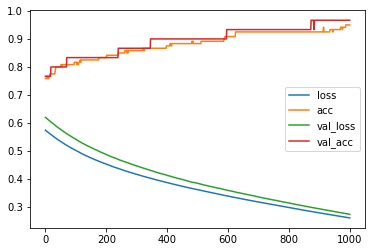

In [29]:
metrics.plot()

In [31]:
model.evaluate(scaled_X_test, y_test)

30/30 [==============================] - 0s 133us/sample - loss: 0.2738 - acc: 0.9667


[0.27384135127067566, 0.96666664]

In [32]:
epochs = len(metrics)

In [33]:
epochs

1000

In [34]:
scaled_X = scaler.fit_transform(X)

In [35]:
# train on all data

In [38]:
model = Sequential()

model.add(Dense(4, activation='relu', input_shape=[4,]))
# we have 3 classes and the output units is 3
model.add(Dense(3, activation='softmax'))
# multiclass classification - softmax
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [39]:
model.fit(scaled_X, y, epochs=1000)

Epoch 1/1000
150/150 [==============================] - 0s 3ms/sample - loss: 1.2384
Epoch 2/1000
150/150 [==============================] - 0s 73us/sample - loss: 1.2278
Epoch 3/1000
150/150 [==============================] - 0s 106us/sample - loss: 1.2165
Epoch 4/1000
150/150 [==============================] - 0s 93us/sample - loss: 1.2073
Epoch 5/1000
150/150 [==============================] - 0s 86us/sample - loss: 1.1966
Epoch 6/1000
150/150 [==============================] - 0s 93us/sample - loss: 1.1883
Epoch 7/1000
150/150 [==============================] - 0s 100us/sample - loss: 1.1798
Epoch 8/1000
150/150 [==============================] - 0s 80us/sample - loss: 1.1720
Epoch 9/1000
150/150 [==============================] - 0s 113us/sample - loss: 1.1648
Epoch 10/1000
150/150 [==============================] - 0s 93us/sample - loss: 1.1579
Epoch 11/1000
150/150 [==============================] - 0s 60us/sample - loss: 1.1509
Epoch 12/1000
150/150 [===========================

150/150 [==============================] - 0s 110us/sample - loss: 0.9184
Epoch 95/1000
150/150 [==============================] - 0s 113us/sample - loss: 0.9153
Epoch 96/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.9122
Epoch 97/1000
150/150 [==============================] - 0s 115us/sample - loss: 0.9093
Epoch 98/1000
150/150 [==============================] - 0s 106us/sample - loss: 0.9063
Epoch 99/1000
150/150 [==============================] - 0s 106us/sample - loss: 0.9032
Epoch 100/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.9003
Epoch 101/1000
150/150 [==============================] - 0s 107us/sample - loss: 0.8971
Epoch 102/1000
150/150 [==============================] - ETA: 0s - loss: 0.895 - 0s 120us/sample - loss: 0.8940
Epoch 103/1000
150/150 [==============================] - 0s 113us/sample - loss: 0.8909
Epoch 104/1000
150/150 [==============================] - 0s 105us/sample - loss: 0.8878
Epoch 105/1000
150

150/150 [==============================] - 0s 75us/sample - loss: 0.6419
Epoch 187/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.6392
Epoch 188/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.6365
Epoch 189/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.6338
Epoch 190/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.6312
Epoch 191/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.6285
Epoch 192/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.6259
Epoch 193/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.6233
Epoch 194/1000
150/150 [==============================] - 0s 70us/sample - loss: 0.6206
Epoch 195/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.6180
Epoch 196/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.6155
Epoch 197/1000
150/150 [=======================

150/150 [==============================] - 0s 73us/sample - loss: 0.4622
Epoch 279/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.4608
Epoch 280/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.4594
Epoch 281/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.4581
Epoch 282/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.4567
Epoch 283/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.4554
Epoch 284/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.4542
Epoch 285/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.4527
Epoch 286/1000
150/150 [==============================] - 0s 63us/sample - loss: 0.4513
Epoch 287/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.4500
Epoch 288/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.4486
Epoch 289/1000
150/150 [=======================

Epoch 371/1000
150/150 [==============================] - 0s 65us/sample - loss: 0.3538
Epoch 372/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.3528
Epoch 373/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.3517
Epoch 374/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.3507
Epoch 375/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.3496
Epoch 376/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.3486
Epoch 377/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.3477
Epoch 378/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.3465
Epoch 379/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.3456
Epoch 380/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.3445
Epoch 381/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.3435
Epoch 382/1000
150/150 [========

150/150 [==============================] - 0s 66us/sample - loss: 0.2697
Epoch 465/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.2691
Epoch 466/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.2683
Epoch 467/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.2675
Epoch 468/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.2667
Epoch 469/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.2659
Epoch 470/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.2652
Epoch 471/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.2646
Epoch 472/1000
150/150 [==============================] - 0s 79us/sample - loss: 0.2637
Epoch 473/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.2629
Epoch 474/1000
150/150 [==============================] - 0s 87us/sample - loss: 0.2623
Epoch 475/1000
150/150 [=======================

150/150 [==============================] - 0s 86us/sample - loss: 0.2107
Epoch 558/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.2102
Epoch 559/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.2099
Epoch 560/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.2091
Epoch 561/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.2086
Epoch 562/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.2081
Epoch 563/1000
150/150 [==============================] - 0s 77us/sample - loss: 0.2076
Epoch 564/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.2071
Epoch 565/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.2067
Epoch 566/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.2063
Epoch 567/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.2056
Epoch 568/1000
150/150 [======================

Epoch 650/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1708
Epoch 651/1000
150/150 [==============================] - 0s 51us/sample - loss: 0.1705
Epoch 652/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.1700
Epoch 653/1000
150/150 [==============================] - 0s 80us/sample - loss: 0.1697
Epoch 654/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1695
Epoch 655/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1691
Epoch 656/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1687
Epoch 657/1000
150/150 [==============================] - 0s 51us/sample - loss: 0.1683
Epoch 658/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.1679
Epoch 659/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1676
Epoch 660/1000
150/150 [==============================] - 0s 50us/sample - loss: 0.1674
Epoch 661/1000
150/150 [========

Epoch 743/1000
150/150 [==============================] - 0s 113us/sample - loss: 0.1430
Epoch 744/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.1427
Epoch 745/1000
150/150 [==============================] - 0s 100us/sample - loss: 0.1426
Epoch 746/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1423
Epoch 747/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1420
Epoch 748/1000
150/150 [==============================] - 0s 107us/sample - loss: 0.1417
Epoch 749/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.1415
Epoch 750/1000
150/150 [==============================] - 0s 107us/sample - loss: 0.1413
Epoch 751/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.1410
Epoch 752/1000
150/150 [==============================] - 0s 113us/sample - loss: 0.1408
Epoch 753/1000
150/150 [==============================] - 0s 93us/sample - loss: 0.1405
Epoch 754/1000
150/150 [===

Epoch 836/1000
150/150 [==============================] - 0s 60us/sample - loss: 0.1231
Epoch 837/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1229
Epoch 838/1000
150/150 [==============================] - 0s 86us/sample - loss: 0.1229
Epoch 839/1000
150/150 [==============================] - 0s 84us/sample - loss: 0.1225
Epoch 840/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1224
Epoch 841/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1221
Epoch 842/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1220
Epoch 843/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1218
Epoch 844/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1217
Epoch 845/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1214
Epoch 846/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.1213
Epoch 847/1000
150/150 [========

150/150 [==============================] - 0s 66us/sample - loss: 0.1084
Epoch 930/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1082
Epoch 931/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1081
Epoch 932/1000
150/150 [==============================] - 0s 73us/sample - loss: 0.1080
Epoch 933/1000
150/150 [==============================] - 0s 67us/sample - loss: 0.1079
Epoch 934/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1077
Epoch 935/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1076
Epoch 936/1000
150/150 [==============================] - 0s 53us/sample - loss: 0.1075
Epoch 937/1000
150/150 [==============================] - 0s 57us/sample - loss: 0.1073
Epoch 938/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1072
Epoch 939/1000
150/150 [==============================] - 0s 66us/sample - loss: 0.1072
Epoch 940/1000
150/150 [=======================

In [40]:
model.save("iris_model.h5")

In [41]:
# We need to save the scaler too

In [42]:
import joblib

In [43]:
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [44]:
from tensorflow.keras.models import load_model

In [46]:
flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

In [56]:
flower_example = {"sepal_length":5.1,
                 "sepal_width":3.5,
                 "petal_length":1.4,
                 "petal_width":0.2}

In [57]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [62]:
def predict(model, scaler, s_json):
    
    
    
    s_len = s_json['sepal_length']
    s_width = s_json['sepal_width']
    p_len = s_json['petal_length']
    p_width = s_json['petal_width']
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = model.predict_classes(flower)[0]
    return classes[class_index]

In [63]:
predict(flower_model, flower_scaler, flower_example)

'setosa'

In [64]:
# Code for Deployment


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib 

flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

def predict(model, scaler, s_json):
    
    
    
    s_len = s_json['sepal_length']
    s_width = s_json['sepal_width']
    p_len = s_json['petal_length']
    p_width = s_json['petal_width']
    
    flower = [[s_len, s_width, p_len, p_width]]
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    flower = scaler.transform(flower)
    
    class_index = model.predict_classes(flower)[0]
    return classes[class_index]